## Quadratic Programming

### Problem Formulation

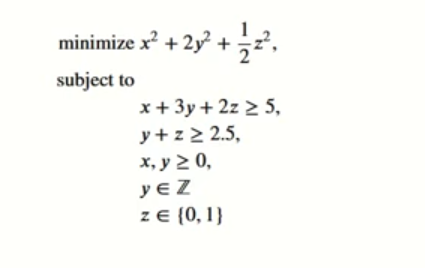

In [1]:
from gurobipy import *

In [2]:
quadratic_model = Model("quadratic")

Set parameter Username
Academic license - for non-commercial use only - expires 2024-06-28


In [3]:
x = quadratic_model.addVar(vtype=GRB.CONTINUOUS, lb=0, name="x")
y = quadratic_model.addVar(vtype=GRB.INTEGER, lb=0, name="y")
z = quadratic_model.addVar(vtype=GRB.BINARY, name="z")

In [4]:
# define objective function
obj_fn = x**2 + 2*y**2 + 0.5*z**2
quadratic_model.setObjective(obj_fn, GRB.MINIMIZE)

In [5]:
# add constraints
quadratic_model.addConstr(x + 3*y + 2*z >= 5)
quadratic_model.addConstr(y + z >= 2.5)


<gurobi.Constr *Awaiting Model Update*>

Solve and output the result

In [6]:
quadratic_model.setParam("outputFlag", False)
quadratic_model.optimize()

In [7]:
print(f"Optimization is done. Objective Function value: {quadratic_model.ObjVal}")

Optimization is done. Objective Function value: 8.5


In [8]:
for v in quadratic_model.getVars():
    print(f"{v.varName}:{v.x}")

x:0.0
y:2.0
z:1.0


### Extras: Update the type of decision variable

Let us change the requirement of integrality on the decision variable y

In [10]:
y.vtype = GRB.CONTINUOUS

quadratic_model.optimize()

print(f"Optimization is done. Objective Function value: {quadratic_model.ObjVal}")
for v in quadratic_model.getVars():
    print(f"{v.varName}:{v.x}")

Optimization is done. Objective Function value: 5.0
x:0.0
y:1.5
z:1.0


### Extras: Add a quadratic constraint

Let us add a quadratic constraint: x² >= y² + z²

In [11]:
quadratic_model.addConstr(y**2 + z**2 <= x**2)

quadratic_model.optimize()

print(f"Optimization is done. Objective Function value: {quadratic_model.ObjVal}")
for v in quadratic_model.getVars():
    print(f"{v.varName}:{v.x}")

Optimization is done. Objective Function value: 13.5
x:2.23606797749979
y:2.0
z:1.0
